In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import pickle

# Model Random Forest
from sklearn.ensemble import RandomForestClassifier

In [173]:
data_train = pd.read_csv(".\\Datasets\\train.csv")


In [174]:
data_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [175]:
data_train['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [176]:
data_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [177]:
data_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [178]:
data_train.shape

(614, 13)

In [179]:
# Check missing values
data_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [180]:
data_train = data_train.drop(columns='Loan_ID')

In [181]:
# Categorical columns and fill na with mode
categorical_col = ['Gender', 'Married', 
                   'Dependents', 'Self_Employed', 
                   'Credit_History']

for col in categorical_col:
    data_train[col].fillna(data_train[col].mode()[0], inplace=True)

C:\Users\Wisnu\AppData\Local\Temp\ipykernel_25576\3381796148.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train[col].fillna(data_train[col].mode()[0], inplace=True)


In [182]:
# Fill na in loan amount with median
data_train['LoanAmount'].fillna(data_train['LoanAmount'].median(), inplace=True)
data_train['Loan_Amount_Term'].fillna(data_train['Loan_Amount_Term'].median(), inplace=True)

C:\Users\Wisnu\AppData\Local\Temp\ipykernel_25576\587884565.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train['LoanAmount'].fillna(data_train['LoanAmount'].median(), inplace=True)
C:\Users\Wisnu\AppData\Local\Temp\ipykernel_25576\587884565.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [183]:
# Check missing values
data_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [184]:
data_train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

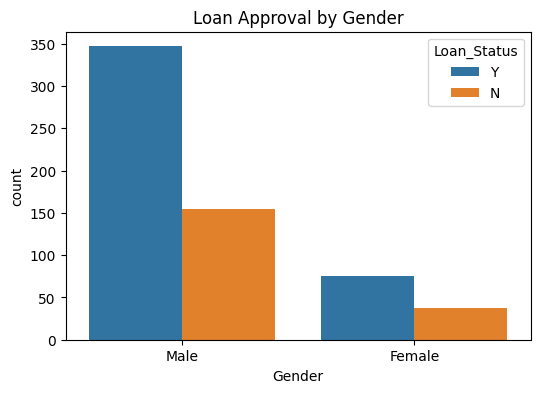

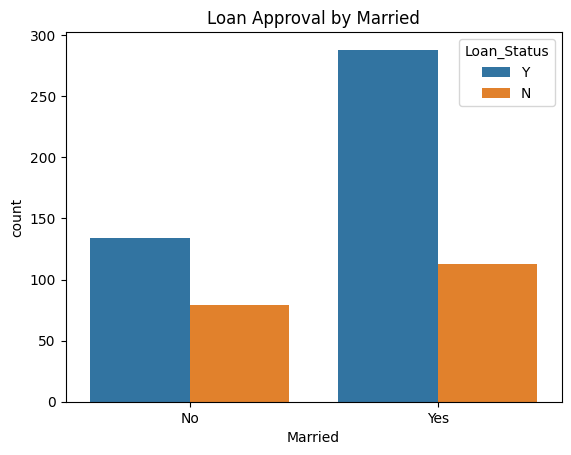

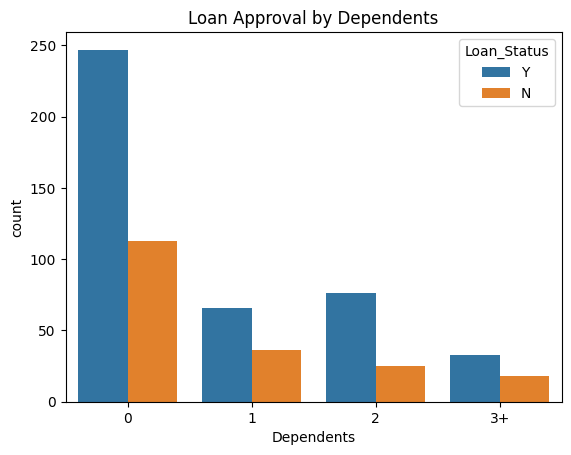

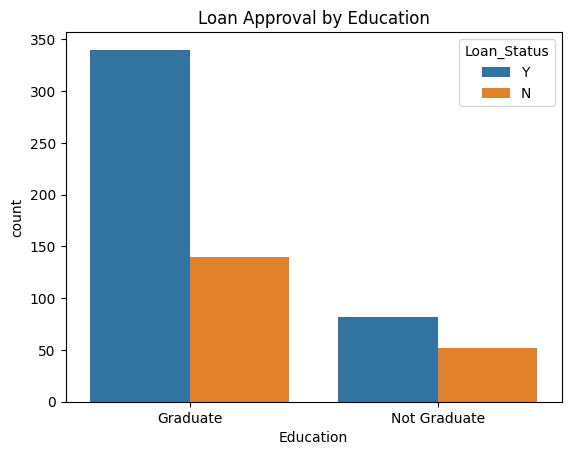

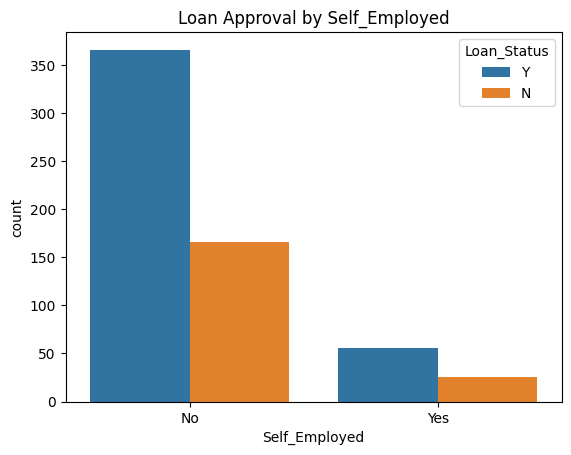

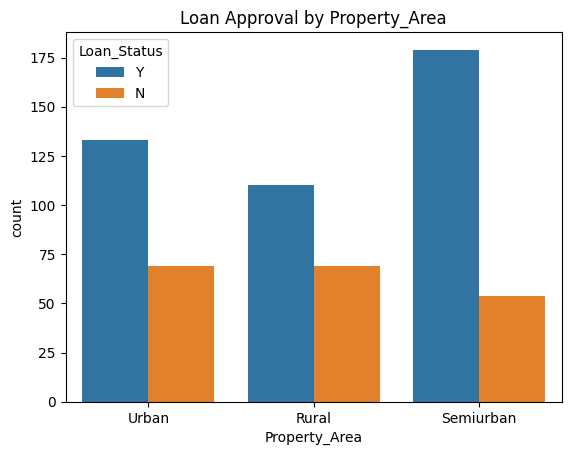

In [185]:
plt.figure(figsize=(6, 4))
for col in data_train.columns:
    if data_train[col].dtype == 'object' and col != 'Loan_Status':
        sns.countplot(x=col, hue='Loan_Status', data=data_train)
        plt.title(f"Loan Approval by {col}")
        plt.show()

In [186]:
numerical_col = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

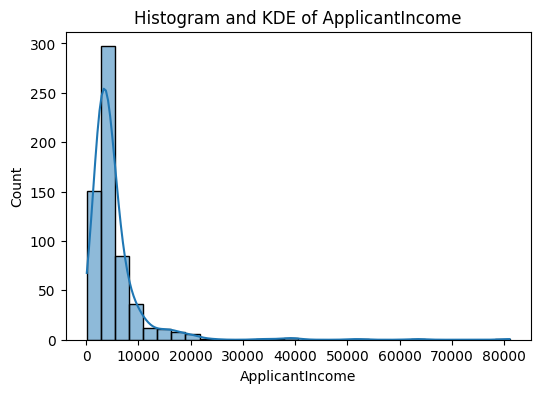

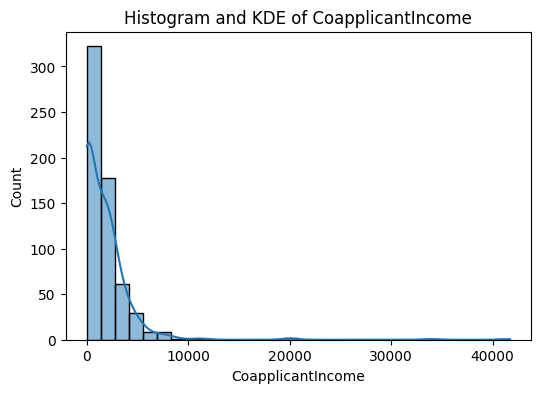

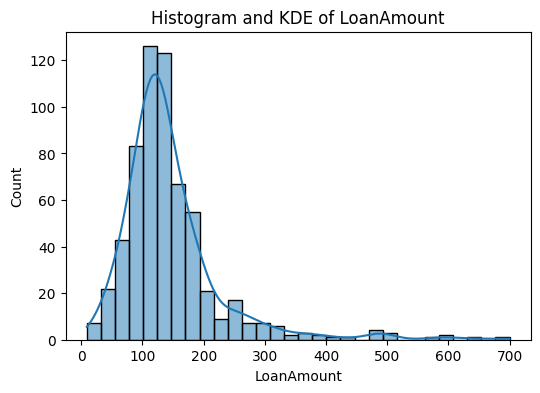

In [187]:
for col in numerical_col:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=data_train, x=col, kde=True, bins=30)
    plt.title(f"Histogram and KDE of {col}")
    plt.show()

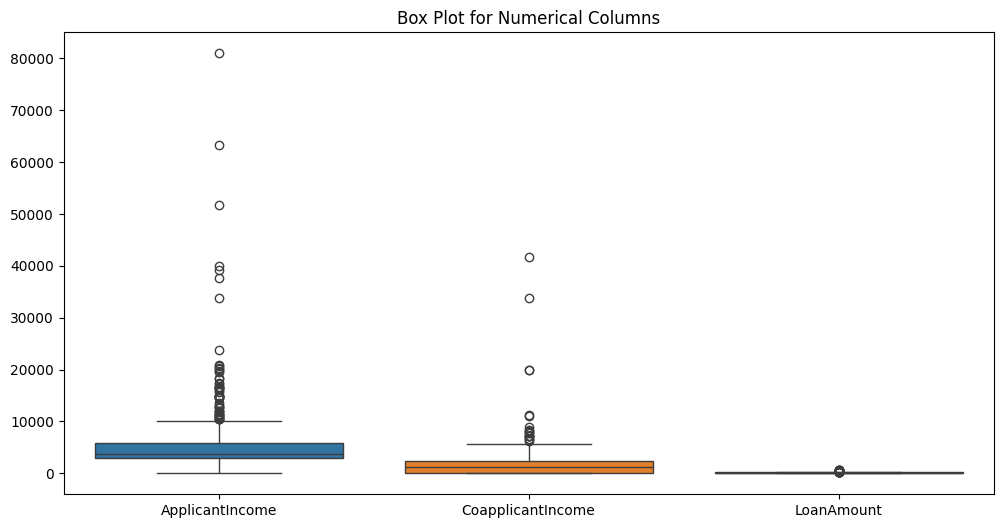

In [188]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_train[numerical_col])
plt.title("Box Plot for Numerical Columns")
plt.show()

In [189]:
for col in numerical_col :
    q1 = data_train[col].quantile(0.25)
    q3 = data_train[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data_train[col]= np.clip(data_train[col], lower_bound , upper_bound)

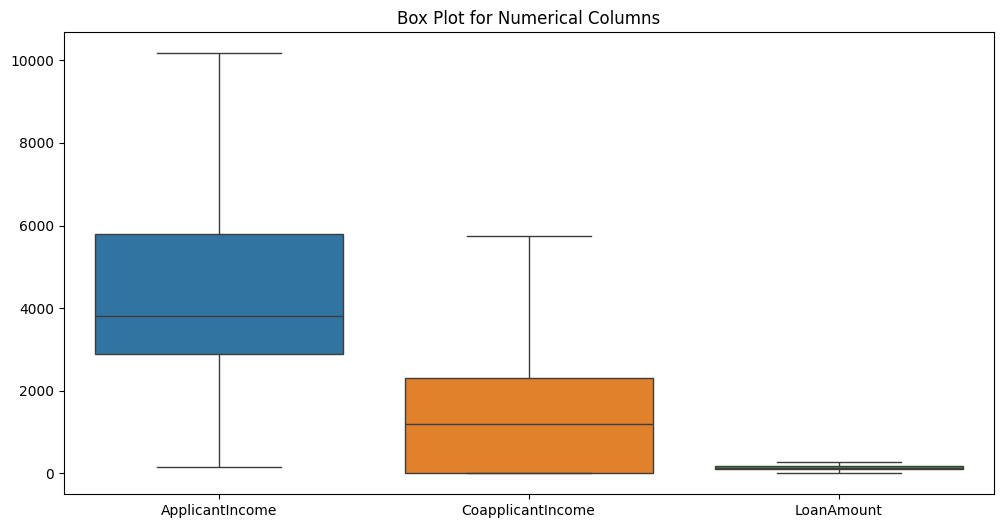

In [190]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_train[numerical_col])
plt.title("Box Plot for Numerical Columns")
plt.show()

In [191]:
data_train['Dependents'].replace('3+', 3, inplace=True)
data_train['Dependents'] = data_train['Dependents'].astype(int)

C:\Users\Wisnu\AppData\Local\Temp\ipykernel_25576\3141336638.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train['Dependents'].replace('3+', 3, inplace=True)


In [192]:
encoder = LabelEncoder()
cat_cols=['Gender','Married','Dependents','Education','Self_Employed',	'Property_Area'	,'Loan_Status']
for col in cat_cols:
    data_train[col] = encoder.fit_transform(data_train[col])

In [193]:
data_train.dtypes

Gender                 int32
Married                int32
Dependents             int64
Education              int32
Self_Employed          int32
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [194]:
x = data_train.drop(columns='Loan_Status')
y = data_train['Loan_Status']

In [195]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)


In [196]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(x_train)
# X_test = scaler.fit_transform(x_test)

In [197]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model_rf.predict(x_test)
score = accuracy_score(y_test, y_pred)
print(f"accuracy score: {score*100:.2f}")

accuracy score: 77.24


In [199]:
with open('model_rf.pkl', 'wb') as f:
    pickle.dump(model_rf, f)

In [200]:
data_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106.0,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072.0,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583.0,0.0,187.0,360.0,1.0,2,1


In [201]:
columns = data_train.columns
print(columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [202]:
data_train['Property_Area'].value_counts()

Property_Area
1    233
2    202
0    179
Name: count, dtype: int64